<a href="https://colab.research.google.com/github/imambucse3/BU/blob/master/imam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("helllo world")

helllo world


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [0]:
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
iris_class      150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dataset.head(7)#change head with sample and tail

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [8]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


In [9]:
#one hot encoding
y=pd.get_dummies(y)
y.sample(7)

,Iris-setosa,Iris-versicolor,Iris-virginica
102,0,0,1
71,0,1,0
4,1,0,0
118,0,0,1
89,0,1,0
108,0,0,1
91,0,1,0


In [10]:
#Selective import Scikit Learn 
from sklearn.model_selection import train_test_split

# Generate Training and Validation Sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


In [11]:
#Importing our model
from sklearn.neural_network import MLPClassifier

#model initialization
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01, #try change hidden layer
                     solver='sgd', verbose=1,  random_state=121) #try verbode=0 to train with out logging
#train our model
h=Model.fit(x_train,y_train)
#use our model to predict
y_pred=Model.predict(x_test)

Iteration 1, loss = 2.45727431
Iteration 2, loss = 2.41996162
Iteration 3, loss = 2.37231284
Iteration 4, loss = 2.31871759
Iteration 5, loss = 2.26311246
Iteration 6, loss = 2.20731430
Iteration 7, loss = 2.15407475
Iteration 8, loss = 2.10373247
Iteration 9, loss = 2.05753243
Iteration 10, loss = 2.01671181
Iteration 11, loss = 1.98171945
Iteration 12, loss = 1.95296099
Iteration 13, loss = 1.92932677
Iteration 14, loss = 1.91056051
Iteration 15, loss = 1.89632210
Iteration 16, loss = 1.88541754
Iteration 17, loss = 1.87779141
Iteration 18, loss = 1.87252463
Iteration 19, loss = 1.86898152
Iteration 20, loss = 1.86665702
Iteration 21, loss = 1.86462829
Iteration 22, loss = 1.86238173
Iteration 23, loss = 1.85985611
Iteration 24, loss = 1.85705125
Iteration 25, loss = 1.85385900
Iteration 26, loss = 1.85025341
Iteration 27, loss = 1.84648539
Iteration 28, loss = 1.84256853
Iteration 29, loss = 1.83848497
Iteration 30, loss = 1.83434005
Iteration 31, loss = 1.83006284
Iteration 32, los

In [12]:
#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred)) # Print summary report
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix 
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        13

   micro avg       1.00      0.98      0.99        45
   macro avg       1.00      0.97      0.99        45
weighted avg       1.00      0.98      0.99        45
 samples avg       0.98      0.98      0.98        45

[[20  0  0]
 [ 1 11  0]
 [ 0  0 13]]
accuracy is  0.9777777777777777


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


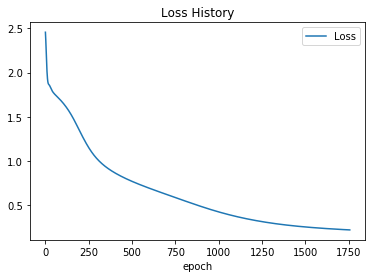

In [15]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])